## Popcorn Design of Experiments

In [4]:
# import python packages
import numpy as np
import scipy as sci
import pyDOE
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline

## Problem Statement

Consider the 2^3 full factorial design:
Levels
Factor - + Notes
______ ________ ________ _________________________________
Brand ordinary gourmet 
P2O 4 8 Popcorn to oil ratio, in cups
Batch 0.33 0.67 Batch size in cups

In [5]:
user_cols=list(['Brand','P2O','Batch'])
# Create the inputs:
encoded_inputs = list( itertools.product([4,8],[0.33,0.67],['ordinary','gourmet']) ) 
# Create the experiment design table:
doe_df = pd.DataFrame(encoded_inputs,columns=user_cols)

## Read Data

In [7]:
popcorn_csv=pd.read_csv('Popcorn.csv', sep=',')
print(popcorn_csv)

   Design     Brand  P2O  Batch  Yield  Taste
0       1  ordinary    4   0.33   6.25      6
1       2   gourmet    4   0.33   8.00      7
2       3  ordinary    8   0.33   6.00     10
3       4   gourmet    8   0.33   9.50      9
4       5  ordinary    4   0.67   8.00      6
5       6   gourmet    4   0.67  15.00      6
6       7  ordinary    8   0.67   9.00      9
7       8   gourmet    8   0.67  17.00      2


## Graph Taste versus Yield

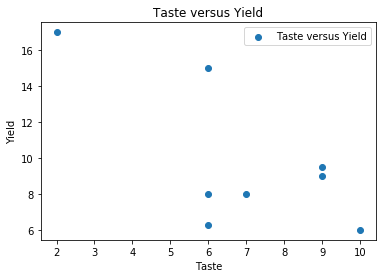

In [8]:
x = popcorn_csv['Taste']
y = popcorn_csv['Yield']

plt.scatter(x,y, label='Taste versus Yield')

plt.xlabel('Taste')
plt.ylabel('Yield')
plt.title('Taste versus Yield')
plt.legend()
plt.show()

## ANOVA of Yield

In [9]:
anova_model=ols('Yield~Brand+P2O+Batch',
data=popcorn_csv).fit()
aov_table=sm.stats.anova_lm(anova_model,type=2) 
print(aov_table)

           df     sum_sq    mean_sq          F    PR(>F)
Brand     1.0  51.257812  51.257812  15.437647  0.017116
P2O       1.0   2.257813   2.257813   0.680000  0.455921
Batch     1.0  46.320312  46.320312  13.950588  0.020208
Residual  4.0  13.281250   3.320312        NaN       NaN


## Main Effects Plots 

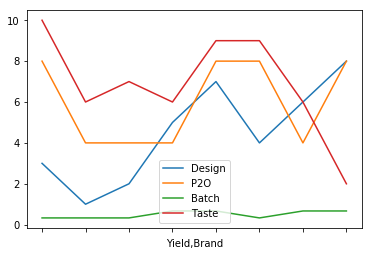

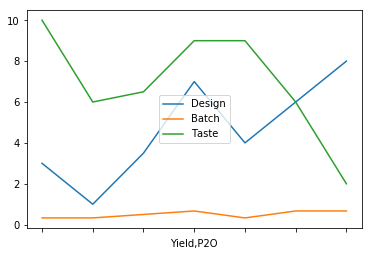

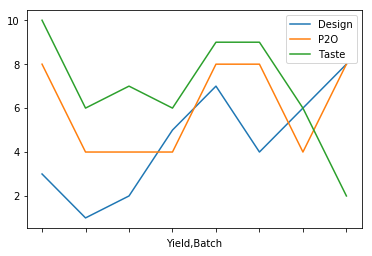

In [10]:
yield_by_brand=popcorn_csv.groupby(['Yield','Brand']).mean()
yield_by_brand.plot(kind='line')
yield_by_p2o=popcorn_csv.groupby(['Yield','P2O']).mean()
yield_by_p2o.plot(kind='line')
yield_by_batch=popcorn_csv.groupby(['Yield','Batch']).mean()
yield_by_batch.plot(kind='line')

## Yield ANOVA with interactions

In [11]:
anova_model=ols('Yield~Brand+P2O+Batch+Brand:P2O+Brand:Batch+Batch:P2O',
data=popcorn_csv).fit()
aov_table=sm.stats.anova_lm(anova_model,type=2) 
print(aov_table)

              df     sum_sq    mean_sq           F    PR(>F)
Brand        1.0  51.257812  51.257812  729.000000  0.023568
P2O          1.0   2.257813   2.257813   32.111111  0.111200
Brand:P2O    1.0   0.945312   0.945312   13.444444  0.169501
Batch        1.0  46.320313  46.320313  658.777778  0.024791
Brand:Batch  1.0  11.882812  11.882812  169.000000  0.048875
Batch:P2O    1.0   0.382813   0.382813    5.444444  0.257762
Residual     1.0   0.070312   0.070312         NaN       NaN


## Taste ANOVA

In [12]:
taste_by_brand=popcorn_csv.groupby(['Taste','Brand']).mean()
taste_by_p2o=popcorn_csv.groupby(['Taste','P2O']).mean()
taste_by_batch=popcorn_csv.groupby(['Taste','Batch']).mean()
anova_model=ols('Taste~Brand+P2O+Batch+Brand:P2O+Brand:Batch+Batch:P2O',
data=popcorn_csv).fit()
aov_table=sm.stats.anova_lm(anova_model,type=2) 
print(aov_table)

              df  sum_sq  mean_sq     F    PR(>F)
Brand        1.0   6.125    6.125  1.96  0.394863
P2O          1.0   3.125    3.125  1.00  0.500000
Brand:P2O    1.0  10.125   10.125  3.24  0.322829
Batch        1.0  10.125   10.125  3.24  0.322829
Brand:Batch  1.0   6.125    6.125  1.96  0.394863
Batch:P2O    1.0   6.125    6.125  1.96  0.394863
Residual     1.0   3.125    3.125   NaN       NaN


## Main Effects Taste ANOVA

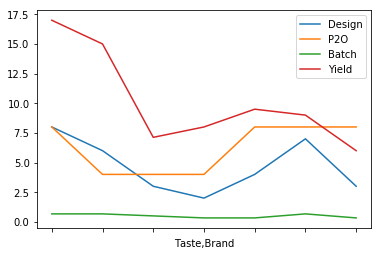

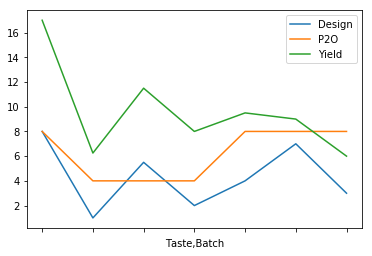

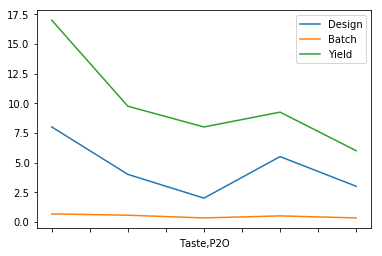

In [13]:
taste_by_brand.plot(kind='line')
taste_by_batch.plot(kind='line')
taste_by_p2o.plot(kind='line')

## Taste ANOVA with interactions

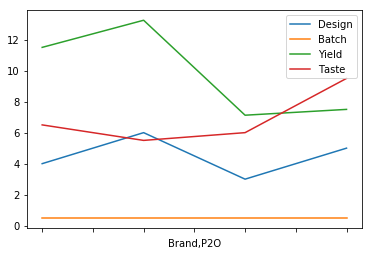

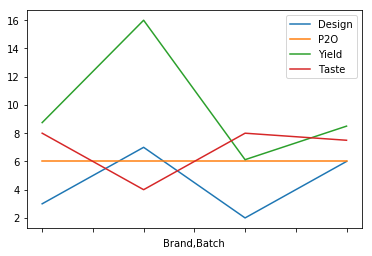

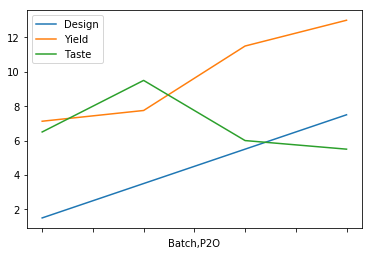

In [15]:
taste_by_brand_p2o=popcorn_csv.groupby(['Brand', 'P2O']).mean()
taste_by_brand_p2o.plot(kind='line')
taste_by_brand_batch=popcorn_csv.groupby(['Brand','Batch']).mean()
taste_by_brand_batch.plot(kind='line')
taste_by_p2o_batch=popcorn_csv.groupby(['Batch','P2O']).mean()
taste_by_p2o_batch.plot(kind='line')

## Multiple Linear Regression  of Yield as a function of Brand, P2O and Batch and their 2-way interactions

In [16]:
anova_model=ols('Yield~Brand+P2O+Batch+Brand:P2O+Brand:Batch+Batch:P2O',
data=popcorn_csv).fit()
aov_table=sm.stats.anova_lm(anova_model,type=2)
print(aov_table)

              df     sum_sq    mean_sq           F    PR(>F)
Brand        1.0  51.257812  51.257812  729.000000  0.023568
P2O          1.0   2.257813   2.257813   32.111111  0.111200
Brand:P2O    1.0   0.945312   0.945312   13.444444  0.169501
Batch        1.0  46.320313  46.320313  658.777778  0.024791
Brand:Batch  1.0  11.882812  11.882812  169.000000  0.048875
Batch:P2O    1.0   0.382813   0.382813    5.444444  0.257762
Residual     1.0   0.070312   0.070312         NaN       NaN


## Operating Room (OR) Cases Forecasting

In [18]:
#read in data
or_cases = pd.read_csv('OR Cases.csv')
# Clean Data
or_cases =or_cases[['Date', 'Number of cases']]
or_cases = or_cases.loc[~or_cases['Date'].isnull(),]
or_cases['Date'] = pd.to_datetime(or_cases['Date'])

## OR Cases Trend Chart

(0, 40)

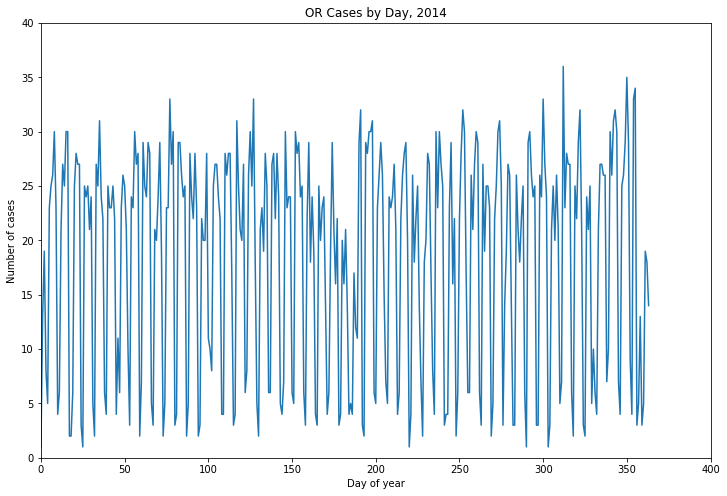

In [19]:
plt.figure(figsize=(12, 8)) # figure size in cm (width x height)
plt.plot(or_cases['Number of cases'])
plt.title('OR Cases by Day, 2014')
plt.xlabel('Day of year')
plt.ylabel('Number of cases')
axes = plt.gca() # get current axes
axes.set_xlim([0,400])
axes.set_ylim([0, 40])

## Create New Columns

In [13]:
or_cases['Day of week'] = or_cases['Date'].dt.strftime('%a')
or_cases['Week of year'] = or_cases['Date'].dt.strftime('%W')
or_cases['Month'] = or_cases['Date'].dt.strftime('%b')
or_cases['Weekday']=or_cases['Date'].dt.strftime('%a').isin(['Mon','Tue','Wed','Thu','Fri'])
or_cases['Weekend']=or_cases['Date'].dt.strftime('%a').isin(['Sat','Sun'])

## Weekday OR Cases Trend Chart

(0, 40)

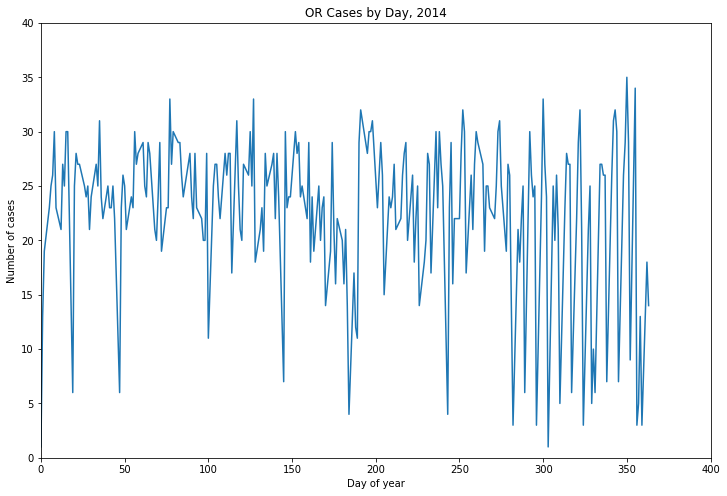

In [22]:
or_cases.loc[or_cases['Day of week'].isin(['Mon','Tue','Wed','Thu','Fri']), 
             'Weekday'] = 'Weekday'
weekday_or_cases = or_cases.loc[or_cases['Weekday'] == 'Weekday',:]
plt.figure(figsize=(12, 8)) # figure size in cm (width x height)
plt.plot(weekday_or_cases['Number of cases'])
plt.title('OR Cases by Day, 2014')
plt.xlabel('Day of year')
plt.ylabel('Number of cases')
axes = plt.gca() # get current axes
axes.set_xlim([0,400])
axes.set_ylim([0, 40])

## Weekend OR Cases

(0, 40)

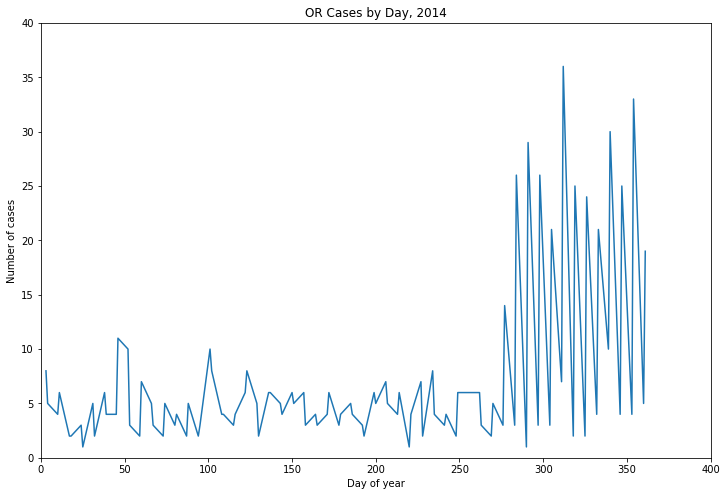

In [24]:
or_cases.loc[or_cases['Day of week'].isin(['Sat', 'Sun']), 
             'Weekday'] = 'Weekend'
weekend_or_cases = or_cases.loc[or_cases['Weekday'] == 'Weekend',:]
plt.figure(figsize=(12, 8)) # figure size in cm (width x height)
plt.plot(weekend_or_cases['Number of cases'])
plt.title('OR Cases by Day, 2014')
plt.xlabel('Day of year')
plt.ylabel('Number of cases')
axes = plt.gca() # get current axes
axes.set_xlim([0,400])
axes.set_ylim([0, 40])

## OR Cases ANOVA

In [25]:
formula = \
'Q("Number of cases") ~ Month+Q("Week of year") +Q("Day of week")+Weekend'
or_cases_model = ols(formula, data=or_cases).fit()
print(sm.stats.anova_lm(or_cases_model,typ=2))

                         sum_sq     df          F        PR(>F)
Month                457.749866   11.0   0.908548  5.324135e-01
Q("Week of year")   2541.350008   52.0   1.067022  3.607259e-01
Q("Day of week")   18759.216777    6.0  68.261457  5.589685e-53
Weekend             4018.365372    1.0  87.732706  1.979172e-18
Residual           13557.499889  296.0        NaN           NaN


## OR Cases Linear Regression

In [26]:
or_cases['Day of year'] = or_cases['Date'].dt.day
formula = \
'Q("Number of cases") ~ Q("Day of year")+Q("Day of week")+Q("Week of year")+Weekday+Date'
or_cases_model = ols(formula, data=or_cases).fit()
print(or_cases_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             OLS Regression Results                             
Dep. Variable:     Q("Number of cases")   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                     0.000
Date:                  Tue, 20 Oct 2020   Prob (F-statistic):                nan
Time:                          21:12:38   Log-Likelihood:                 10034.
No. Observations:                   364   AIC:                        -1.934e+04
Df Residuals:                         0   BIC:                        -1.792e+04
Df Model:                           363                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

## OR Cases Additive Forecast

In [27]:
model=ExponentialSmoothing(or_cases['Number of cases'], trend="add").fit()
model.predict()

364    18.432671
dtype: float64

## OR Cases Multiplicative Forecast

In [28]:
model=ExponentialSmoothing(or_cases['Number of cases'], trend="mul").fit()
model.predict()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:69: RuntimeWarning: overflow encountered in double_scalars
  l[i] = (y_alpha[i - 1]) + (alphac * (l[i - 1] * b[i - 1]**phi))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:71: RuntimeWarning: overflow encountered in multiply
  return sqeuclidean(l * b**phi, y)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:708: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(l[i - 1], dampen(b[i - 1], phi)))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:710: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * detrend(l[i], l[i - 1])) + \
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.

364   NaN
dtype: float64

## OR Cases 30 Day Forecast

In [32]:
model=ExponentialSmoothing(or_cases['Number of cases'], trend="add").fit()
model.forecast(steps=30)
#model_mult=ExponentialSmoothing(or_cases['Number of cases'], trend="mul").fit()
#model_mult.forecast(steps=30)

364    18.432671
365    18.432972
366    18.433274
367    18.433576
368    18.433877
369    18.434179
370    18.434480
371    18.434782
372    18.435084
373    18.435385
374    18.435687
375    18.435988
376    18.436290
377    18.436592
378    18.436893
379    18.437195
380    18.437496
381    18.437798
382    18.438100
383    18.438401
384    18.438703
385    18.439004
386    18.439306
387    18.439607
388    18.439909
389    18.440211
390    18.440512
391    18.440814
392    18.441115
393    18.441417
dtype: float64

## OR Cases by Day Histogram

Text(0, 0.5, 'Number of days')

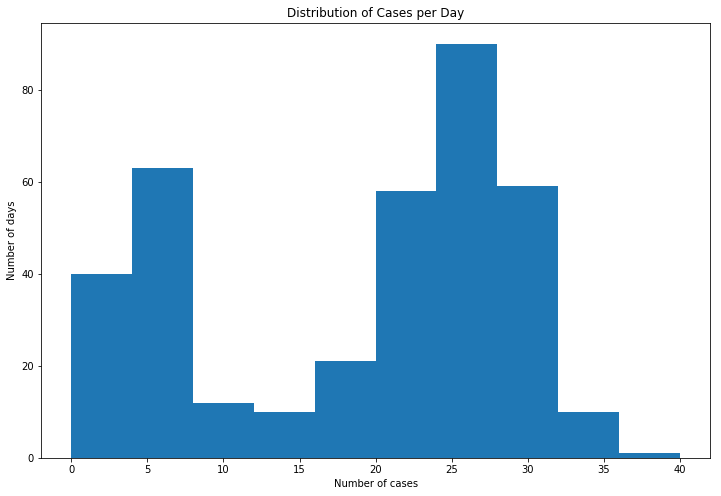

In [7]:
plt.figure(figsize=(12, 8)) # figure size in cm (width x height)
n, bins, patches = plt.hist(or_cases['Number of cases'],
                            range=(0, 40))
plt.title('Distribution of Cases per Day')
plt.xlabel('Number of cases')
plt.ylabel('Number of days')

## OR Cases by Day Probability Density Histogram

Text(0, 0.5, 'Probability density')

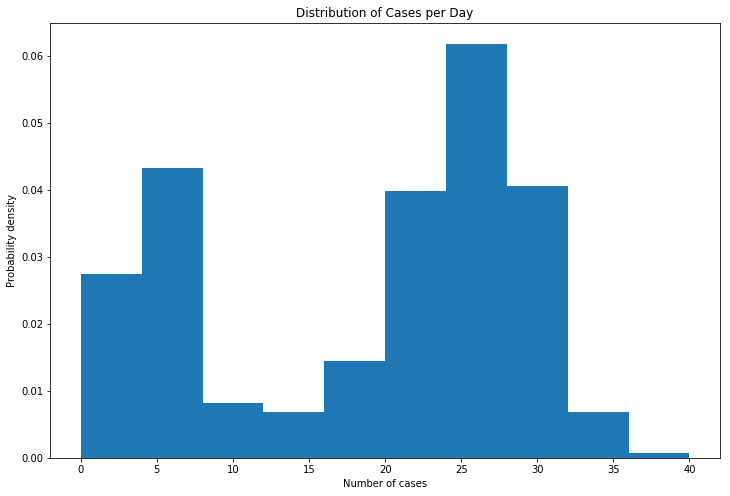

In [9]:
plt.figure(figsize=(12, 8)) # figure size in cm (width x height)
n, bins, patches = plt.hist(or_cases['Number of cases'],
                            density=True,
                            range=(0, 40))
plt.title('Distribution of Cases per Day')
plt.xlabel('Number of cases')
plt.ylabel('Probability density')

## OR Cases Pairwise Comparison Tables

In [18]:
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(or_cases['Number of cases'],or_cases['Month'])
print(tukey_results)
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(or_cases['Number of cases'],or_cases['Week of year'])
print(tukey_results)
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(or_cases['Number of cases'],or_cases['Weekday'])
print(tukey_results)
tukey_results=sm.stats.multicomp.pairwise_tukeyhsd(or_cases['Number of cases'],or_cases['Weekend'])
print(tukey_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 Apr    Aug   -1.4462  -10.082   7.1896 False 
 Apr    Dec    0.7333   -7.973   9.4396 False 
 Apr    Feb   -0.0833  -8.9437   8.7771 False 
 Apr    Jan   -0.8978  -9.5336   7.7379 False 
 Apr    Jul   -0.8333  -9.4691   7.8025 False 
 Apr    Jun   -1.5333  -10.2396  7.173  False 
 Apr    Mar   -0.0269  -8.6627   8.6089 False 
 Apr    May   -0.1237  -8.7594   8.5121 False 
 Apr    Nov   -1.2667   -9.973   7.4396 False 
 Apr    Oct    0.1667  -8.4691   8.8025 False 
 Apr    Sep   -0.2333  -8.9396   8.473  False 
 Aug    Dec    2.1796  -6.4562  10.8154 False 
 Aug    Feb    1.3629  -7.4282   10.154 False 
 Aug    Jan    0.5484  -8.0163   9.1131 False 
 Aug    Jul    0.6129  -7.9518   9.1776 False 
 Aug    Jun   -0.0871  -8.7229   8.5487 False 
 Aug    Mar    1.4194  -7.1454   9.9841 False 
 Aug    May    1.3226  -7.2421   9.8873 False 
 Aug    N

## OR Cases Pairwise Comparison Boxplots

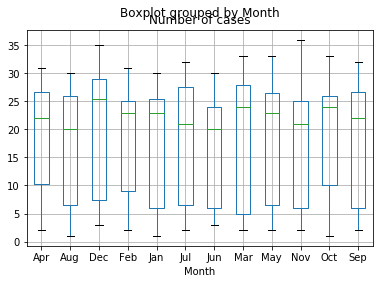

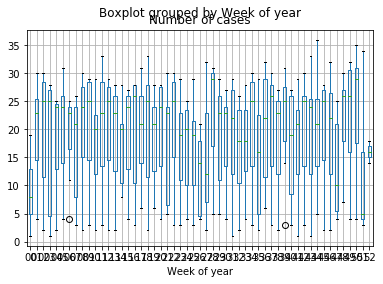

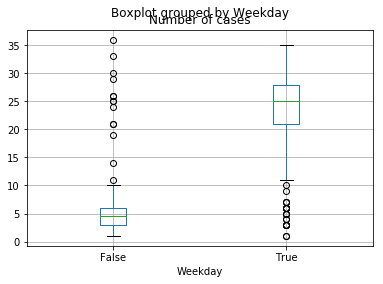

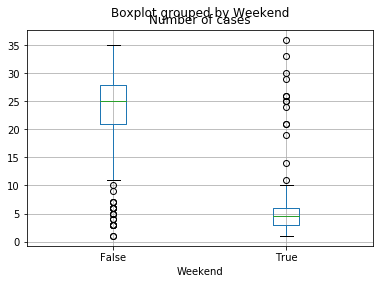

In [17]:
or_cases.boxplot('Number of cases',by='Month')
or_cases.boxplot('Number of cases',by='Week of year')
or_cases.boxplot('Number of cases',by='Weekday')
or_cases.boxplot('Number of cases',by='Weekend')